In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
drama_df = pd.read_csv("./archive/korean_drama.csv")
drama_df.head()

,kdrama_id,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,NaN,NaN,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547


In [36]:
drama_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kdrama_id     1752 non-null   object 
 1   drama_name    1752 non-null   object 
 2   year          1752 non-null   int64  
 3   director      1036 non-null   object 
 4   screenwriter  959 non-null    object 
 5   country       1752 non-null   object 
 6   type          1752 non-null   object 
 7   tot_eps       1752 non-null   int64  
 8   duration      1728 non-null   float64
 9   start_dt      1752 non-null   object 
 10  end_dt        1752 non-null   object 
 11  aired_on      1520 non-null   object 
 12  org_net       1344 non-null   object 
 13  content_rt    1752 non-null   object 
 14  synopsis      1584 non-null   object 
 15  rank          1752 non-null   int64  
 16  pop           1752 non-null   int64  
dtypes: float64(1), int64(4), object(12)
memory usage: 232.8+ KB


In [37]:
drama_df['content_rt'].unique()

array(['Not Yet Rated', '15+ - Teens 15 or older',
       '18+ Restricted (violence & profanity)', '13+ - Teens 13 or older',
       'G - All Ages', 'R - Restricted Screening (nudity & violence)'],
      dtype=object)

In [38]:
drama_df['org_net'].unique()

array([nan, 'Netflix', 'Disney+ Hulu', 'Naver TV Cast', 'MBC', 'SBS',
       'ENA Genie TV', 'jTBC Netflix TVING', 'Netflix TVING tvN',
       'MBC Dramanet', 'TVING', 'Amazon Prime ENA TVING', 'tvN', 'KBS1',
       'KBS2 ViuTV', 'Channel A', 'TVING tvN', 'jTBC Netflix',
       'ENA TVING', 'SBS ViuTV', 'KBS2', 'Hulu TVING tvN', 'KBS2 Viki',
       'ENA Genie TV ViuTV', 'Amazon Prime TVING', 'ENA Genie TV Viki',
       'Netflix tvN', 'jTBC', 'Amazon Prime SBS', 'Netflix SBS',
       'TV Chosun', 'iQiyi', 'ENA', 'OBS', 'Viki', 'jTBC ViuTV',
       'DRAMAcube ENA SBS SBS Plus', 'vLive', 'EBS', 'Amazon Prime MBC',
       'ENA Viki', 'tvN Viki', 'KBS2 Viki ViuTV', 'Daum Kakao TV',
       'Amazon Prime jTBC', 'ENA jTBC', 'SBS Viki ViuTV', 'Hulu MBC',
       'Naver TV Cast Viki vLive', 'ENA Netflix', 'KBS2 Netflix',
       'Daum Kakao TV Netflix', 'MBC ViuTV', 'Naver TV Cast vLive',
       'MBC Netflix', 'Disney+', 'OCN', 'MBN Viki', 'DRAMAcube',
       'LINE TV Viki', 'iQiyi Viki', 'iQiyi t

In [39]:
import re

def change_orgnet(item):
    if isinstance(item, float):
        return item
    
    ch = {"Channel A": "ChannelA",
          "Amazon Prime": "AmazonPrime",
          "KBS1": "KBS",
          "KBS2": "KBS",
          "TV Chosun": "TVChosun",
          "Tencent Video": "TencetVideo",
          "On Style": "OnStyle",
          "Daum Kakao TV": "KakaoTV",
          "Naver TV Cast": "NaverTVCast",
          "BS TV Tokyo": "BSTVTokyo",
          "Genie TV": "GenieTv",
          "Sohu TV": "SohuTv",
          "SBS Plus": "SBS",
          "MBC every1": "MBC",
          "LINE TV" : "LINETV"}
    for k, v in ch.items():
        item = re.sub(k, v, item)

    return item

drama_df['org_net'] = drama_df['org_net'].apply(change_orgnet)
drama_df['org_net'].to_excel("./org_net_list.xlsx")

In [40]:
from collections import Counter

def count_elements(item):
    counter = Counter(str(item).replace(',', '').split(" "))
    return counter

In [41]:
count_org_df = drama_df['org_net'].apply(count_elements)

tmp = {}
for dic in count_org_df.values:
    for k, v in dic.items():
        try:
            tmp[k] += v
        except:
            tmp[k] = v

tmp

{'nan': 408,
 'Netflix': 133,
 'Disney+': 12,
 'Hulu': 13,
 'NaverTVCast': 299,
 'MBC': 158,
 'SBS': 148,
 'ENA': 17,
 'GenieTv': 17,
 'jTBC': 104,
 'TVING': 36,
 'tvN': 167,
 'Dramanet': 6,
 'AmazonPrime': 7,
 'KBS': 176,
 'ViuTV': 18,
 'ChannelA': 13,
 'Viki': 92,
 'TVChosun': 15,
 'iQiyi': 21,
 'OBS': 1,
 'DRAMAcube': 2,
 'vLive': 96,
 'EBS': 2,
 'KakaoTV': 24,
 'OCN': 47,
 'MBN': 15,
 'LINETV': 2,
 'TencetVideo': 3,
 'Tooniverse': 11,
 'AbemaTV': 1,
 'DramaX': 8,
 'Kocowa': 1,
 'FTV': 1,
 'Oksusu': 10,
 'OnStyle': 4,
 "O'live": 4,
 'XtvN': 1,
 '': 1,
 'BSTVTokyo': 1,
 'SohuTv': 2,
 'E-Channel': 1,
 'QTV': 1,
 'Mnet': 2}

In [42]:
s = 0
for v in tmp.values():
    s += v
s

2101

In [43]:
len(drama_df)

1752

# 랭킹 집계 되는 드라마들의 방영사

In [44]:
count_org_df = drama_df.loc[drama_df['rank']<=10000, 'org_net'].apply(count_elements)

tmp = {}
for dic in count_org_df.values:
    for k, v in dic.items():
        try:
            tmp[k] += v
        except:
            tmp[k] = v

tmp

{'nan': 129,
 'Netflix': 132,
 'Disney+': 12,
 'Hulu': 13,
 'MBC': 127,
 'SBS': 123,
 'ENA': 15,
 'GenieTv': 9,
 'jTBC': 101,
 'TVING': 33,
 'tvN': 153,
 'AmazonPrime': 7,
 'KBS': 149,
 'ViuTV': 18,
 'ChannelA': 9,
 'Viki': 89,
 'TVChosun': 13,
 'iQiyi': 20,
 'DRAMAcube': 2,
 'vLive': 65,
 'EBS': 2,
 'KakaoTV': 19,
 'NaverTVCast': 148,
 'OCN': 47,
 'MBN': 12,
 'LINETV': 2,
 'TencetVideo': 3,
 'AbemaTV': 1,
 'DramaX': 5,
 'Tooniverse': 2,
 'Oksusu': 8,
 'OnStyle': 2,
 "O'live": 1,
 'XtvN': 1,
 'Dramanet': 2,
 'BSTVTokyo': 1,
 'SohuTv': 2,
 'E-Channel': 1,
 'Mnet': 2}

In [45]:
drama_df.drop(labels='kdrama_id', axis=1, inplace=True)

In [46]:
import time

for i in drama_df.index:
    air_start = drama_df.loc[i, 'start_dt']
    air_end = drama_df.loc[i, 'end_dt']
    air_on = drama_df.loc[i, 'aired_on']
    org_net = drama_df.loc[i, 'org_net']

    try:
        air_start = time.strftime("%Y-%m-%d", time.strptime(air_start, "%b %d, %Y"))
        air_end = time.strftime("%Y-%m-%d", time.strptime(air_end, "%b %d, %Y"))
    except:
        pass

    # air_on = air_on.split(", ") if "," in air_on else air_on
    # if isinstance(air_on, str):
    #     air_on = air_on.astype(object)
    
    # if not isinstance(org_net, float):
    #     org_net = org_net.split(" ") if " " in org_net else org_net
    #     if isinstance(org_net, str):
    #         org_net = org_net.astype(object)

    # print(org_net)
    drama_df.loc[i, 'start_dt'] = air_start
    drama_df.loc[i, 'end_dt'] = air_end
    # drama_df.ix[i, 'aired_on'] = [', '.join(air_on)]
    # drama_df.loc[i, 'org_net'] = org_net

drama_df

,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,2023-08-02,2023-08-02,Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,2023-07-28,2023-07-28,Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,To Be Honest,2023,NaN,NaN,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,2023-06-30,2023-06-30,Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],South Korea,Drama,20,3720.0,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232,29
1748,Enchanting Neighbor,2015,['Park Kyung Ryul'],['Park Hye Ryun'],South Korea,Drama,120,2100.0,2015-01-05,2015-06-22,"Monday, Tuesday, Wednesday, Thursday, Friday",SBS,15+ - Teens 15 or older,"Gong Soo Rae only love her husband, Seo Bong G...",47882,10759
1749,Iron Lady Cha,2015,"['Jang Joon Ho', 'Oh Hyun Chang']",['Seol Kyung Eun'],South Korea,Drama,111,2400.0,2015-01-05,2015-06-12,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,People born as a member of the baby boomer gen...,58155,14841
1750,The Family Is Coming,2015,['Joo Dong Min'],['Kim Shin Hye'],South Korea,Drama,20,3600.0,2015-01-03,2015-03-15,"Saturday, Sunday",SBS,15+ - Teens 15 or older,A grandma has abandoned her family 50 years ag...,7995,4289


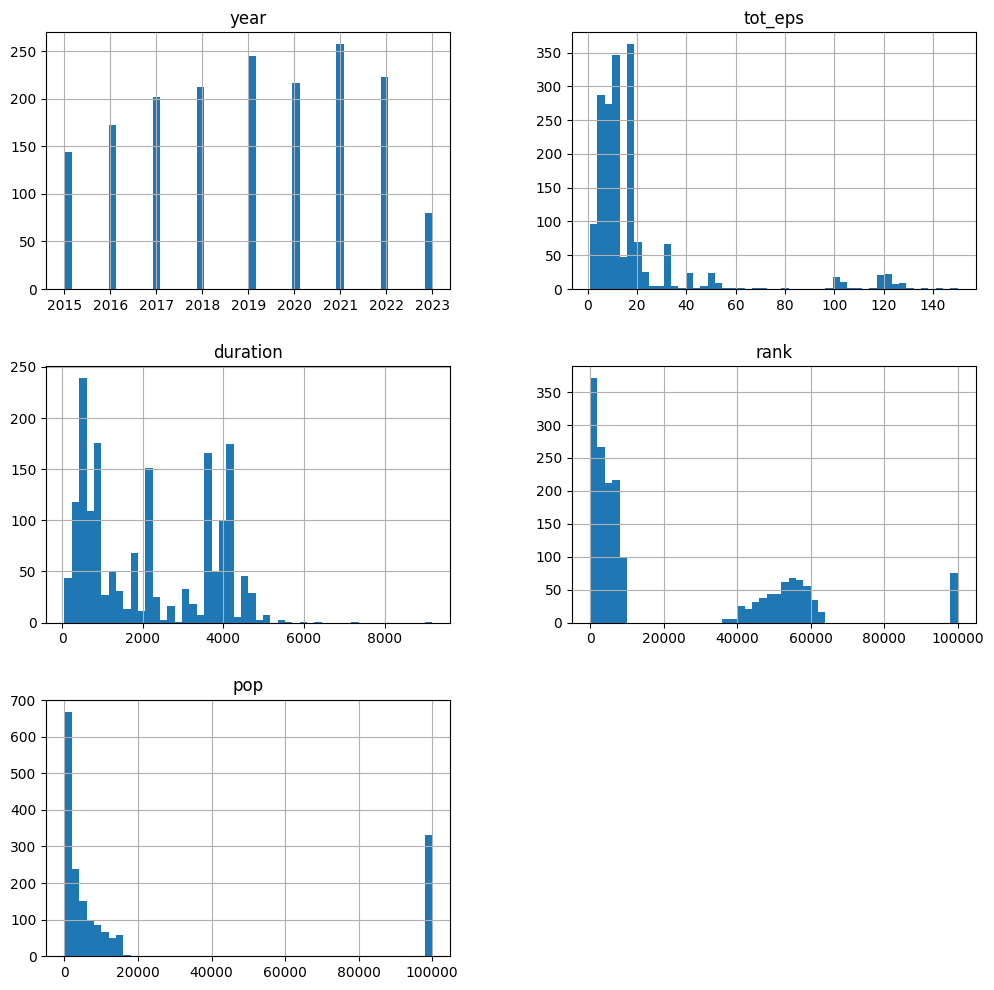

In [47]:
drama_df.hist(bins=50, figsize=(12,12))
plt.show()

In [48]:
drama_df.loc[drama_df['tot_eps'] > 120].head()

,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
148,The Love in Your Eyes,2022,['Go Young Tak'],['Na Seung Hyun'],South Korea,Drama,123,1620.0,2022-10-03,2023-03-24,"Monday, Tuesday, Wednesday, Thursday, Friday",KBS,15+ - Teens 15 or older,"Young Yi lost her husband at a young age, but ...",4136,5840
250,The Secret House,2022,['Lee Min Soo'],['Won Young Ok'],South Korea,Drama,124,1800.0,2022-04-11,2022-10-10,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,A lawyer who is chasing traces of his missing ...,52145,6017
396,The All-Round Wife,2021,['Choi Ji Yeong'],['Kim Ji Wan'],South Korea,Drama,122,2100.0,2021-10-04,2022-04-08,"Monday, Tuesday, Wednesday, Thursday, Friday",KBS,15+ - Teens 15 or older,A drama centered around the district of Gangna...,56592,9778
428,Second Husband,2021,['Kim Chil Bong'],['Seo Hyun Joo'],South Korea,Drama,150,2100.0,2021-08-09,2022-04-05,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,It revolves around Bong Seon Hwa and her famil...,4758,3452
685,My Wonderful Life,2020,['Kim Yong Min'],NaN,South Korea,Drama,127,2100.0,2020-06-29,2021-01-08,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,"A vegetable seller who barely makes ends meet,...",58179,8064


# In Rank 한 데이터들

In [49]:
drama_df_in_rank = drama_df.loc[drama_df['rank']<=10000]
drama_df_in_rank

,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,2023-08-02,2023-08-02,Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,2023-07-28,2023-07-28,Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
4,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,2023-06-30,2023-06-30,Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
6,Numbers,2023,['Kim Chil Bong'],"['Oh Hye Seok', 'Jung An']",South Korea,Drama,12,3600.0,2023-06-23,2023-07-29,"Friday, Saturday",MBC,15+ - Teens 15 or older,Ho Woo is the first and only high school gradu...,2685,1546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,Spy,2015,['Park Hyun Suk'],"['Han Sang Woon', 'Lee Kang']",South Korea,Drama,16,3000.0,2015-01-09,2015-03-06,Friday,KBS,Not Yet Rated,Hye Rim is a perfect mom inside and out. She p...,7174,2132
1745,"Persevere, Goo Hae Ra",2015,"['Kim Yong Bum', 'An Joon Young']","['Jung Soo Hyun', 'Shin Myung Jin']",South Korea,Drama,12,4500.0,2015-01-09,2015-03-27,Friday,Mnet,Not Yet Rated,"Goo Hae Ra, who is an aspiring musician is see...",7009,1746
1746,Heart to Heart,2015,['Lee Yoon Jung'],['Lee Jung Ah'],South Korea,Drama,16,3600.0,2015-01-09,2015-03-07,"Friday, Saturday",tvN,15+ - Teens 15 or older,Cha Hong Do suffers from social phobia and has...,2650,943
1747,"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],South Korea,Drama,20,3720.0,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232,29


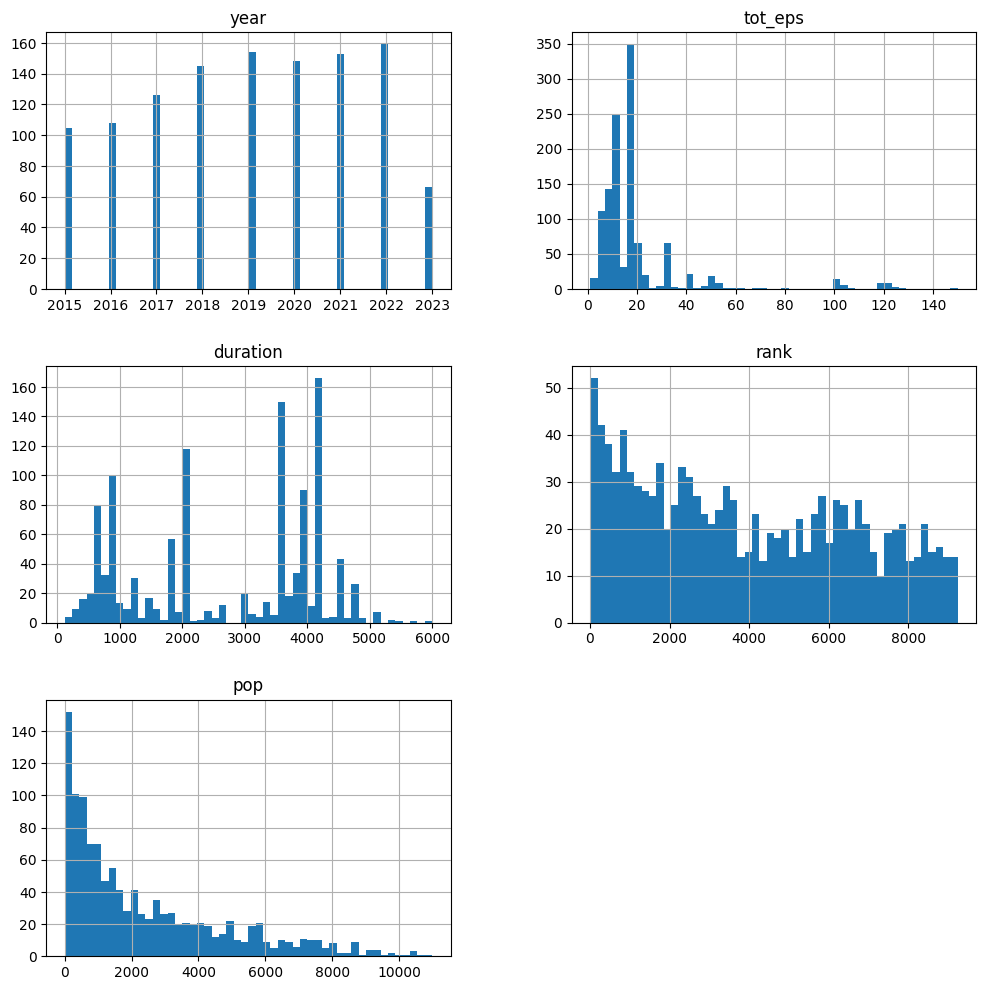

In [50]:
drama_df_in_rank.hist(bins=50, figsize=(12,12))
plt.show()

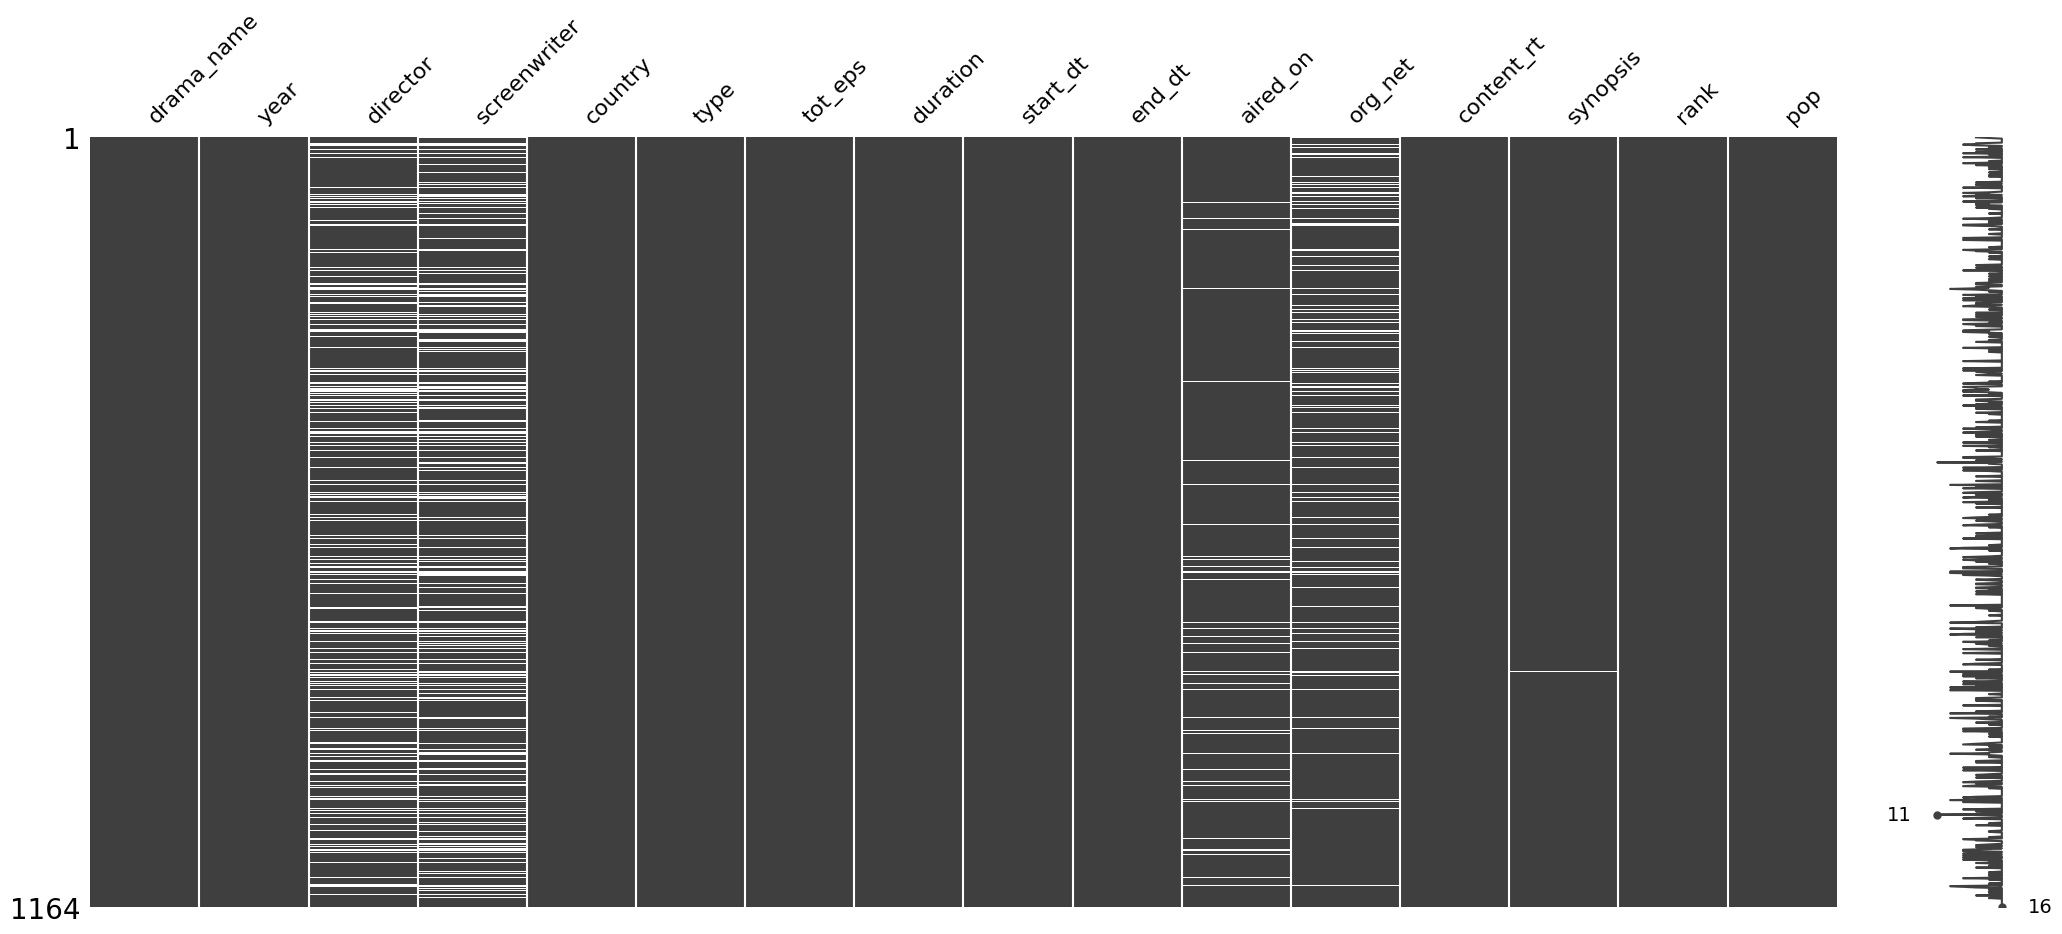

In [51]:
import missingno

missingno.matrix(drama_df_in_rank);

In [52]:
count_org_df = drama_df_in_rank['org_net'].apply(count_elements)

origin_count_dic = {}
for dic in count_org_df.values:
    for k, v in dic.items():
        try:
            origin_count_dic[k] += v
        except:
            origin_count_dic[k] = v

origin_count_dic

{'nan': 129,
 'Netflix': 132,
 'Disney+': 12,
 'Hulu': 13,
 'MBC': 127,
 'SBS': 123,
 'ENA': 15,
 'GenieTv': 9,
 'jTBC': 101,
 'TVING': 33,
 'tvN': 153,
 'AmazonPrime': 7,
 'KBS': 149,
 'ViuTV': 18,
 'ChannelA': 9,
 'Viki': 89,
 'TVChosun': 13,
 'iQiyi': 20,
 'DRAMAcube': 2,
 'vLive': 65,
 'EBS': 2,
 'KakaoTV': 19,
 'NaverTVCast': 148,
 'OCN': 47,
 'MBN': 12,
 'LINETV': 2,
 'TencetVideo': 3,
 'AbemaTV': 1,
 'DramaX': 5,
 'Tooniverse': 2,
 'Oksusu': 8,
 'OnStyle': 2,
 "O'live": 1,
 'XtvN': 1,
 'Dramanet': 2,
 'BSTVTokyo': 1,
 'SohuTv': 2,
 'E-Channel': 1,
 'Mnet': 2}

# 한국명, 장르, 시청자 데이터 크롤링 (in MyDramaList)
- 검색명 : 영문명

In [53]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from user_agent import generate_user_agent
from tqdm import tqdm
import openpyxl
import re
from urllib.parse import quote

def search_drama(search_url):
    header = {'User-Agent': generate_user_agent()}
    req = Request(search_url, headers=header)
    res = urlopen(req)
    soup = BeautifulSoup(res.read(), 'html.parser')

    drama_url = "https://mydramalist.com" + soup.find("div", "col-xs-3 row-cell film-cover cover").find("a")['href']
    req = Request(drama_url, headers=header)
    res = urlopen(req)
    drama_soup = BeautifulSoup(res.read(), 'html.parser')
    
    details = drama_soup.find("div", "show-detailsxss")
    kor_name = details.find("li", "list-item p-a-0").text.split(":")[1].strip()
    genres = details.find("li", "list-item p-a-0 show-genres").findAll("a")
    
    genre_list = []
    for genre in genres:
        genre_list.append(genre.text)
    genre_list = ", ".join(genre_list)

    watchers = drama_soup.findAll("div", "box clear hidden-sm-down")[-1].findAll("li", "list-item p-a-0")[-2].text
    watchers = watchers.split(":")[1].split(",")
    watchers = int("".join(watchers))
    return kor_name, genre_list, watchers

drama_df_in_rank['kor_name'] = ""
drama_df_in_rank['genres'] = ""
drama_df_in_rank['watchers'] = ""

try:
    wb = openpyxl.load_workbook(f'./archive/crawling_in_10000.xlsx')
except:
    wb = openpyxl.Workbook()
w1 = wb.worksheets[0]

for idx in tqdm(drama_df_in_rank.index):
    name = drama_df_in_rank.loc[idx, 'drama_name']

    if w1.cell(idx+1, 1).value != None:
        kor_name = w1.cell(idx+1, 1).value
        genre_list = w1.cell(idx+1, 2).value
        watchers = w1.cell(idx+1, 3).value

    else:
        try:
            search_url = "https://mydramalist.com/search?q=" + quote("korea_" + name.replace(" ", "_"))
            kor_name, genre_list, watchers = search_drama(search_url)
        except:
            search_url = "https://mydramalist.com/search?q=" + quote(name.replace(" ", "_"))
            kor_name, genre_list, watchers = search_drama(search_url)

    drama_df_in_rank.loc[idx, 'kor_name'] = kor_name
    drama_df_in_rank.loc[idx, 'genres'] = genre_list
    drama_df_in_rank.loc[idx, 'watchers'] = watchers

    w1.cell(idx+1, 1).value = kor_name
    w1.cell(idx+1, 2).value = genre_list
    w1.cell(idx+1, 3).value = watchers
    wb.save(f'./archive/crawling_in_10000.xlsx')

C:\Users\CHO\AppData\Local\Temp\ipykernel_3536\1736442205.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drama_df_in_rank['kor_name'] = ""
C:\Users\CHO\AppData\Local\Temp\ipykernel_3536\1736442205.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drama_df_in_rank['genres'] = ""
C:\Users\CHO\AppData\Local\Temp\ipykernel_3536\1736442205.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [58]:
drama_df_in_rank.to_excel("./archive/drama_df_in_rank.xlsx")

---
절취선
---

In [5]:
import pandas as pd
import missingno

drama_df_in_rank = pd.read_excel("./archive/drama_df_in_rank.xlsx", index_col=0)

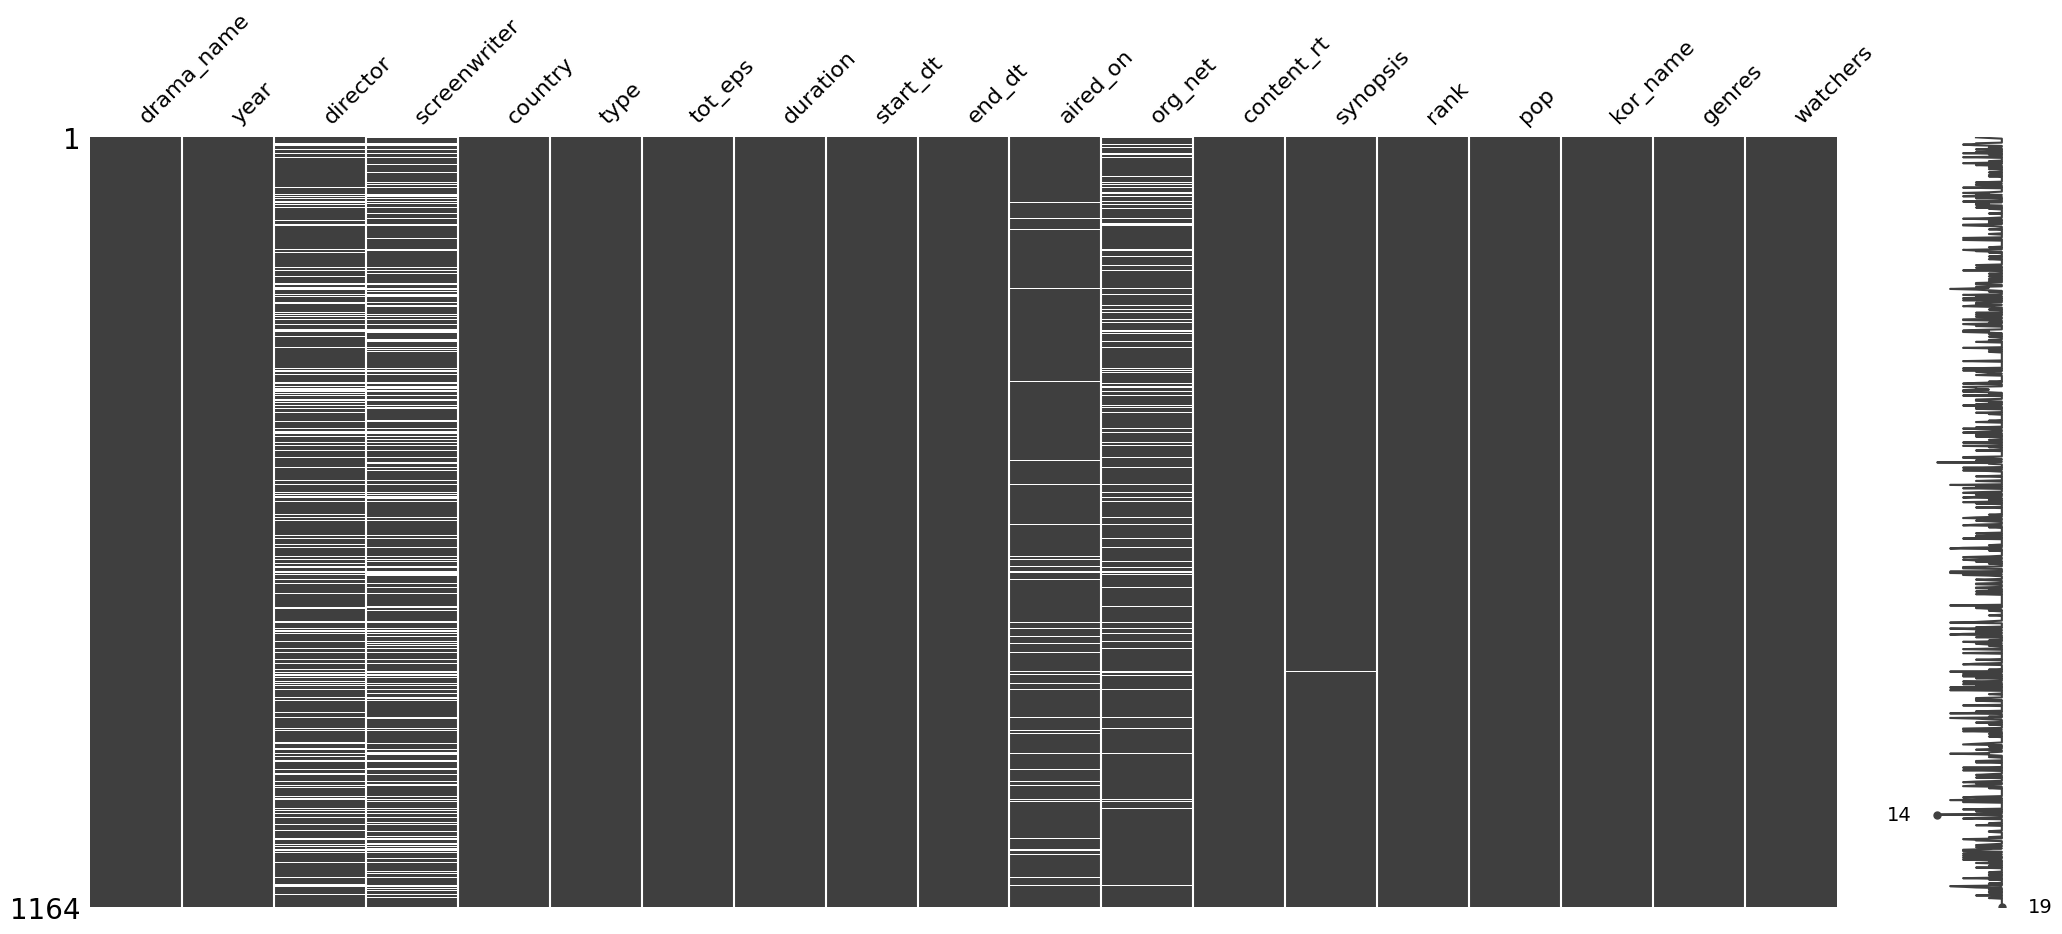

In [6]:
missingno.matrix(drama_df_in_rank);

In [7]:
drama_df_in_rank['kor_name'].unique(), len(drama_df_in_rank['kor_name'].unique()), len(drama_df_in_rank['drama_name'].unique())

(array(['따라바람', '디피 시즌2', '형사록 시즌2', ..., '하트 투 하트', '킬미힐미', '떴다! 패밀리'],
       dtype=object),
 1107,
 1164)

# 한글명 중복 행들

In [8]:
drama_df_in_rank.loc[drama_df_in_rank.duplicated(subset='kor_name', keep=False), ['drama_name', 'kor_name', 'genres', 'watchers']].sort_values(by='kor_name')

,drama_name,kor_name,genres,watchers
834,One Fine Week,7일만 로맨스2,Romance,4490
571,One Fine Week Season 2,7일만 로맨스2,Romance,4490
1349,Love Playlist Season 2,연애플레이리스트 시즌2,"Romance, Life, Youth, Drama",6289
1408,Love Playlist,연애플레이리스트 시즌2,"Romance, Life, Youth, Drama",6289
1166,Partners for Justice,검법남녀 시즌2,"Mystery, Law, Drama, Medical",9492
...,...,...,...,...
131,Shadow Detective,형사록 시즌2,"Mystery, Drama",1268
96,Alchemy of Souls Season 2: Light and Shadow,환혼,"Action, Historical, Romance, Fantasy",46309
209,Alchemy of Souls,환혼,"Action, Historical, Romance, Fantasy",46309
1248,Black Knight: The Man Who Guards Me,흑기사,"Romance, Drama, Fantasy, Melodrama",13902


In [9]:
drama_df_in_rank.loc[drama_df_in_rank.duplicated(subset='kor_name', keep=False), ['drama_name', 'kor_name', 'genres', 'watchers']].sort_values(by='kor_name').to_excel("./archive/drama_df_in_rank_duplicate.xlsx")

# 크롤링 잘못된 중복 데이터 수정
- 엑셀에서 작업 후 불러오기

In [10]:
drama_df_duplicate = pd.read_excel("./archive/drama_df_in_rank_duplicate.xlsx")

In [11]:
for idx, num in enumerate(drama_df_duplicate['Unnamed: 0']):
    drama_df_in_rank.loc[num, 'kor_name'] = drama_df_duplicate.loc[idx, 'kor_name']
    drama_df_in_rank.loc[num, 'genres'] = drama_df_duplicate.loc[idx, 'genres']
    drama_df_in_rank.loc[num, 'watchers'] = drama_df_duplicate.loc[idx, 'watchers']

drama_df_in_rank

,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop,kor_name,genres,watchers
0,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500,2023-08-02,2023-08-02,Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238,따라바람,"Music, Comedy, Romance, Youth",8303
1,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000,2023-07-28,2023-07-28,Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084,디피 시즌2,"Action, Military, Drama",15515
2,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915,형사록 시즌2,"Mystery, Drama",1268
4,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700,2023-06-30,2023-06-30,Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547,마스터셰프 코리아 셀러브리티,Food,36
6,Numbers,2023,['Kim Chil Bong'],"['Oh Hye Seok', 'Jung An']",South Korea,Drama,12,3600,2023-06-23,2023-07-29,"Friday, Saturday",MBC,15+ - Teens 15 or older,Ho Woo is the first and only high school gradu...,2685,1546,넘버스,"Action, Thriller, Mystery, Drama",9545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,Spy,2015,['Park Hyun Suk'],"['Han Sang Woon', 'Lee Kang']",South Korea,Drama,16,3000,2015-01-09,2015-03-06,Friday,KBS,Not Yet Rated,Hye Rim is a perfect mom inside and out. She p...,7174,2132,풍운 - 임란야화,"Drama, War",2
1745,"Persevere, Goo Hae Ra",2015,"['Kim Yong Bum', 'An Joon Young']","['Jung Soo Hyun', 'Shin Myung Jin']",South Korea,Drama,12,4500,2015-01-09,2015-03-27,Friday,Mnet,Not Yet Rated,"Goo Hae Ra, who is an aspiring musician is see...",7009,1746,칠전팔기 구해라,"Music, Romance, Youth",7339
1746,Heart to Heart,2015,['Lee Yoon Jung'],['Lee Jung Ah'],South Korea,Drama,16,3600,2015-01-09,2015-03-07,"Friday, Saturday",tvN,15+ - Teens 15 or older,Cha Hong Do suffers from social phobia and has...,2650,943,하트 투 하트,"Psychological, Comedy, Romance",14447
1747,"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],South Korea,Drama,20,3720,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232,29,킬미힐미,"Psychological, Comedy, Romance, Drama",105002


In [12]:
drama_df_in_rank.to_excel("./archive/drama_df_in_rank_fix_kor_name.xlsx")

# 한국명에 한국명 아닌 데이터 몇개 안돼서 엑셀에서 수정 및 확인

# 잘못 가져온 데이터 확인
- 기준 : rank에 비해 너무 낮은 watchers

In [2]:
import pandas as pd
drama_df_in_rank = pd.read_excel("./archive/drama_df_in_rank_fix_kor_name.xlsx", index_col=0)

In [5]:
drama_df_in_rank.loc[drama_df_in_rank['pop']<=1000, ['drama_name', 'pop', 'watchers']].sort_values(by='pop', ascending=False)

,drama_name,pop,watchers
162,Once Again,999,57
1638,Bubblegum,996,13589
347,Shadow Beauty,991,14002
1248,Black Knight: The Man Who Guards Me,989,13902
404,One the Woman,984,14034
...,...,...,...
1153,What's Wrong with Secretary Kim,5,169241
1586,Descendants of the Sun,4,3031
1460,Weightlifting Fairy Kim Bok Joo,3,176295
1418,Strong Woman Do Bong Soon,2,6056


In [14]:
drama_df_incorrect_pop = drama_df_in_rank.loc[(drama_df_in_rank['pop']<=1000) & (drama_df_in_rank['watchers']<=10000)]
drama_df_incorrect_pop.to_excel("./archive/drama_df_in_rank_incorrect_pop.xlsx")
drama_df_incorrect_pop


,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop,kor_name,genres,watchers
4,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700,2023-06-30,2023-06-30,Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547,마스터셰프 코리아 셀러브리티,Food,36
50,Unintentional Love Story,2023,['Jang Eui Soon'],NaN,South Korea,Drama,10,2100,2023-03-17,2023-04-14,Friday,TVING,15+ - Teens 15 or older,When Ji Won Young's direct superior at work is...,3286,778,비의도적 연애담 스핀오프,"Romance, Drama",405
56,Our Dating Sim,2023,['Lim Hyun Hee'],['Lee Yun Seul'],South Korea,Drama,8,900,2023-03-09,2023-03-30,Thursday,NaN,13+ - Teens 13 or older,A story about what happens when two men who ha...,2185,569,우리 연애 시뮬레이션 (영화),"Business, Romance",127
81,Island,2022,['Bae Jong'],"['Jang Yoon Mi', 'Oh Bo Hyun']",South Korea,Drama,6,3300,2022-12-30,2023-01-13,Friday,AmazonPrime TVING,15+ - Teens 15 or older,Won Mi Ho is the only daughter of her father w...,1646,326,이재수의 난,"Historical, Drama, War",41
116,Weak Hero Class 1,2022,NaN,NaN,South Korea,Drama,8,2400,2022-11-18,2022-11-18,Friday,NaN,18+ Restricted (violence & profanity),Yeon Shi Eun is a model student who ranks at t...,15,179,약한영웅 Class 1 메이킹,Documentary,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,Yong Pal,2015,['Oh Jin Suk'],['Jang Hyuk Rin'],South Korea,Drama,18,3900,2015-08-05,2015-10-01,"Wednesday, Thursday",SBS,15+ - Teens 15 or older,Kim Tae Hyeon is a talented surgeon. Desperate...,3338,470,위기일발 용팔이,Comedy,11
1680,Oh My Ghost,2015,['Yoo Je Won'],['Yang Hee Seung'],South Korea,Drama,16,3600,2015-07-03,2015-08-22,"Friday, Saturday",tvN,13+ - Teens 13 or older,"Bong Sun, a timid young woman, is possessed by...",1003,48,오!마이고스트,"Mystery, Horror, Comedy, Supernatural",245
1699,The Producers,2015,"['Pyo Min Soo', 'Yoon Sung Ho', 'Seo Soo Min']",['Park Ji Eun'],South Korea,Drama,12,5100,2015-05-15,2015-06-20,"Friday, Saturday",KBS,15+ - Teens 15 or older,The drama is set in the backstage world of bro...,5309,267,프로듀사 스페셜,"Drama, Documentary",1391
1720,The Lover,2015,['Kim Tae Eun'],['Kim Min Seok'],South Korea,Drama,12,3000,2015-04-02,2015-06-25,Thursday,Mnet,18+ Restricted (violence & profanity),The series talk about four different couples l...,5486,527,牛郎织女,"Historical, Romance",44


In [19]:
drama_df_incorrect_pop = pd.read_excel("./archive/drama_df_in_rank_incorrect_pop_edit.xlsx")
drama_df_incorrect_pop

,Unnamed: 0,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop,kor_name,genres,watchers
0,4,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700,2023-06-30,2023-06-30,Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547,셀러브리티,"Thriller, Mystery, Drama",27033
1,50,Unintentional Love Story,2023,['Jang Eui Soon'],NaN,South Korea,Drama,10,2100,2023-03-17,2023-04-14,Friday,TVING,15+ - Teens 15 or older,When Ji Won Young's direct superior at work is...,3286,778,비의도적 연애담,"Comedy, Romance",17802
2,56,Our Dating Sim,2023,['Lim Hyun Hee'],['Lee Yun Seul'],South Korea,Drama,8,900,2023-03-09,2023-03-30,Thursday,NaN,13+ - Teens 13 or older,A story about what happens when two men who ha...,2185,569,우리 연애 시뮬레이션,"Business, Romance",22976
3,81,Island,2022,['Bae Jong'],"['Jang Yoon Mi', 'Oh Bo Hyun']",South Korea,Drama,6,3300,2022-12-30,2023-01-13,Friday,AmazonPrime TVING,15+ - Teens 15 or older,Won Mi Ho is the only daughter of her father w...,1646,326,아일랜드,"Action, Thriller, Horror, Fantasy",33741
4,116,Weak Hero Class 1,2022,NaN,NaN,South Korea,Drama,8,2400,2022-11-18,2022-11-18,Friday,NaN,18+ Restricted (violence & profanity),Yeon Shi Eun is a model student who ranks at t...,15,179,약한영웅 Class 1,"Action, Youth, Drama",51892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1661,Twenty Again,2015,['Kim Hyung Shik'],['So Hyun Kyung'],South Korea,Drama,16,3720,2015-08-28,2015-10-17,"Friday, Saturday",tvN,15+ - Teens 15 or older,38-year-old Ha No Ra dreamt of becoming a danc...,1932,637,두번째 스물살,"Comedy, Romance, Life, Drama",20103
117,1670,Yong Pal,2015,['Oh Jin Suk'],['Jang Hyuk Rin'],South Korea,Drama,18,3900,2015-08-05,2015-10-01,"Wednesday, Thursday",SBS,15+ - Teens 15 or older,Kim Tae Hyeon is a talented surgeon. Desperate...,3338,470,용팔이,"Action, Romance, Drama, Medical",24923
118,1680,Oh My Ghost,2015,['Yoo Je Won'],['Yang Hee Seung'],South Korea,Drama,16,3600,2015-07-03,2015-08-22,"Friday, Saturday",tvN,13+ - Teens 13 or older,"Bong Sun, a timid young woman, is possessed by...",1003,48,오 나의 귀신님,"Thriller, Comedy, Romance, Supernatural",90551
119,1699,The Producers,2015,"['Pyo Min Soo', 'Yoon Sung Ho', 'Seo Soo Min']",['Park Ji Eun'],South Korea,Drama,12,5100,2015-05-15,2015-06-20,"Friday, Saturday",KBS,15+ - Teens 15 or older,The drama is set in the backstage world of bro...,5309,267,프로듀사,"Comedy, Romance, Drama",37558


In [21]:
for idx, num in enumerate(drama_df_incorrect_pop['Unnamed: 0']):
    drama_df_in_rank.loc[num, 'kor_name'] = drama_df_incorrect_pop.loc[idx, 'kor_name']
    drama_df_in_rank.loc[num, 'genres'] = drama_df_incorrect_pop.loc[idx, 'genres']
    drama_df_in_rank.loc[num, 'watchers'] = drama_df_incorrect_pop.loc[idx, 'watchers']

drama_df_in_rank.to_excel("./archive/drama_df_in_rank_final.xlsx")
drama_df_in_rank.loc[4]

drama_name                                              Celebrity
year                                                         2023
director                                         ['Kim Chul Gyu']
screenwriter                                     ['Kim Yi Young']
country                                               South Korea
type                                                        Drama
tot_eps                                                        12
duration                                                     2700
start_dt                                               2023-06-30
end_dt                                                 2023-06-30
aired_on                                                   Friday
org_net                                                   Netflix
content_rt                  18+ Restricted (violence & profanity)
synopsis        Fame. Money. Power. One young woman fights to ...
rank                                                          826
pop       